In [1]:
import pandas as pd
import requests
import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm_notebook
import glob
import os
import sys

In [2]:
%load_ext version_information
%version_information requests, pandas, matplotlib, seaborn

Software versions
Python 3.5.4 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.1.0
OS Darwin 16.7.0 x86_64 i386 64bit
requests 2.18.4
pandas 0.20.3
matplotlib 2.0.2
seaborn 0.8.0
Wed Dec 20 15:20:22 2017 PST

In [3]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
# plt.rcParams['figure.figsize'] = (9, 6)
# plt.rcParams['axes.labelpad'] = 10
# sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

In [4]:
pd.options.display.max_rows = 10

# When to buy and sell on QuadrigaCX
What are the best times to buy and sell? What are the best currencies to trade for CAD.

Judge based on difference from USD exchange, converted to CAD with CAD/USD conversion-rate data.

---
### Download and save data

In [5]:
LAST_FEW_DAYS = False

In [6]:
if not os.path.exists('data'):
    os.makedirs('data')
    
CURRENT_DATE = datetime.datetime.now().strftime('%Y-%m-%d')
SAVE_PATH = os.path.join('data', CURRENT_DATE)
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
    
if LAST_FEW_DAYS:
    limit = 100
else:
    limit = 1e6

In [7]:
# See here for more details: https://medium.com/@agalea91/cryptocompare-api-quick-start-guide-ca4430a484d4

def hourly_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    assert len(df) > 0
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [8]:
# Bitcoin CAD

df = hourly_price_historical('BTC', 'CAD',
                             limit=limit, aggregate=1,
                             exchange='QuadrigaCX')
file_path = os.path.join(SAVE_PATH, 'btc-cad-hourly.csv')
df.to_csv(file_path, index=False)

In [9]:
# Bitcoin USD

df = hourly_price_historical('BTC', 'USDT',
                             limit=limit, aggregate=1)
file_path = os.path.join(SAVE_PATH, 'btc-usd-hourly.csv')
df.to_csv(file_path, index=False)

In [10]:
# Ethereum CAD

df = hourly_price_historical('ETH', 'CAD',
                             limit=limit, aggregate=1,
                             exchange='QuadrigaCX')
assert len(df) > 0
file_path = os.path.join(SAVE_PATH, 'eth-cad-hourly.csv')
df.to_csv(file_path, index=False)

In [11]:
# Ethereum USD

df = hourly_price_historical('ETH', 'USDT',
                             limit=limit, aggregate=1)
file_path = os.path.join(SAVE_PATH, 'eth-usd-hourly.csv')
df.to_csv(file_path, index=False)

In [12]:
# Litecoin CAD

df = hourly_price_historical('LTC', 'CAD',
                             limit=limit, aggregate=1,
                             exchange='QuadrigaCX')
file_path = os.path.join(SAVE_PATH, 'ltc-cad-hourly.csv')
df.to_csv(file_path, index=False)

In [13]:
# Litecoin USD

df = hourly_price_historical('LTC', 'USDT',
                             limit=limit, aggregate=1)
file_path = os.path.join(SAVE_PATH, 'ltc-usd-hourly.csv')
df.to_csv(file_path, index=False)

In [14]:
# Get CAD-USD exchange rates

def exchange_rate_historical(start_date):
    url = 'https://api.fixer.io/{}'.format(start_date)
    url += '?symbols=CAD,USD'
    print('GET ' + url)
    page = requests.get(url)
    data = page.json()
    cad_usd_rate = data['rates']['CAD'] / data['rates']['USD']
    return data['date'], cad_usd_rate

In [15]:
def daily_exchange_rate_historical(start_date):
    colnames = ['Date', 'Price']
    data = []
    date_range = pd.date_range(start_date, datetime.datetime.now())
    for date in tqdm_notebook(date_range):
        d = exchange_rate_historical(date.strftime('%Y-%m-%d'))
        data.append(d)
        
    return pd.DataFrame(data, columns=colnames)

In [16]:
df = daily_exchange_rate_historical(df.timestamp.min())

A Jupyter Widget

GET https://api.fixer.io/2017-09-28?symbols=CAD,USD
GET https://api.fixer.io/2017-09-29?symbols=CAD,USD
GET https://api.fixer.io/2017-09-30?symbols=CAD,USD
GET https://api.fixer.io/2017-10-01?symbols=CAD,USD
GET https://api.fixer.io/2017-10-02?symbols=CAD,USD
GET https://api.fixer.io/2017-10-03?symbols=CAD,USD
GET https://api.fixer.io/2017-10-04?symbols=CAD,USD
GET https://api.fixer.io/2017-10-05?symbols=CAD,USD
GET https://api.fixer.io/2017-10-06?symbols=CAD,USD
GET https://api.fixer.io/2017-10-07?symbols=CAD,USD
GET https://api.fixer.io/2017-10-08?symbols=CAD,USD
GET https://api.fixer.io/2017-10-09?symbols=CAD,USD
GET https://api.fixer.io/2017-10-10?symbols=CAD,USD
GET https://api.fixer.io/2017-10-11?symbols=CAD,USD
GET https://api.fixer.io/2017-10-12?symbols=CAD,USD
GET https://api.fixer.io/2017-10-13?symbols=CAD,USD
GET https://api.fixer.io/2017-10-14?symbols=CAD,USD
GET https://api.fixer.io/2017-10-15?symbols=CAD,USD
GET https://api.fixer.io/2017-10-16?symbols=CAD,USD
GET https://

In [17]:
df

,Date,Price
0,2017-09-28,1.246731
1,2017-09-29,1.244028
2,2017-09-29,1.244028
3,2017-09-29,1.244028
4,2017-10-02,1.251107
...,...,...
79,2017-12-15,1.276470
80,2017-12-15,1.276470
81,2017-12-18,1.287410
82,2017-12-19,1.286222


In [18]:
file_path = os.path.join(SAVE_PATH, 'usd-cad-daily.csv')
df.to_csv(file_path, index=False)

---
### Calculate price deltas

In [19]:
ls -l data/2017-12-20

total 1784
-rw-r--r--  1 alex  staff  154712 20 Dec 15:20 btc-cad-hourly.csv
-rw-r--r--  1 alex  staff  161002 20 Dec 15:20 btc-usd-hourly.csv
-rw-r--r--  1 alex  staff  145153 20 Dec 15:20 eth-cad-hourly.csv
-rw-r--r--  1 alex  staff  151592 20 Dec 15:20 eth-usd-hourly.csv
-rw-r--r--  1 alex  staff  139825 20 Dec 15:20 ltc-cad-hourly.csv
-rw-r--r--  1 alex  staff  142045 20 Dec 15:20 ltc-usd-hourly.csv
-rw-r--r--  1 alex  staff    2513 20 Dec 15:22 usd-cad-daily.csv


In [20]:
def calc_price_delta(df_coin_cad, df_coin_usd, df_usd_cad):
    ''' Price delta = QuadrigaCX price - Average USD price (converted) '''
    
    # Add Y-m-d ids to join on
    df_coin_usd['ymd'] = [datetime.datetime.strftime(t, '%Y%m%d') for t in pd.to_datetime(df_coin_usd.timestamp)]
    df_usd_cad['ymd'] = [datetime.datetime.strftime(t, '%Y%m%d') for t in pd.to_datetime(df_usd_cad.Date)]
    
    # Convert coin-USD to coin-CAD-converted
    _df_usd_cad = df_usd_cad[['ymd', 'Price']].rename(columns={'Price': 'usd_cad_rate'})
    _df_coin_usd = pd.merge(df_coin_usd, _df_usd_cad,
                            on='ymd', how='left')
    _df_coin_usd = _df_coin_usd.sort_values('timestamp')
    _df_coin_usd['usd_cad_rate'] = _df_coin_usd.usd_cad_rate.fillna(method='pad')
    _df_coin_usd['close_usd_convert_to_cad'] = _df_coin_usd.close * _df_coin_usd.usd_cad_rate    
    
    # Calcualte price deltas on resulting df
    _df_coin_cad = pd.merge(df_coin_cad, _df_coin_usd[['close_usd_convert_to_cad', 'time']],
                            on='time', how='left')
    _df_coin_cad['price_delta'] = _df_coin_cad.close - _df_coin_cad.close_usd_convert_to_cad
    
    _df_coin_cad.timestamp = pd.to_datetime(_df_coin_cad.timestamp)
    return _df_coin_cad[['timestamp', 'close', 'close_usd_convert_to_cad', 'price_delta']]

In [21]:
def load_data(coin):
    df_btc_cad = pd.read_csv(os.path.join(SAVE_PATH, coin + '-cad-hourly.csv'))
    df_btc_usd = pd.read_csv(os.path.join(SAVE_PATH, coin + '-usd-hourly.csv'))
    df_usd_cad = pd.read_csv(os.path.join(SAVE_PATH, 'usd-cad-daily.csv'))
    
    df = calc_price_delta(df_btc_cad, df_btc_usd, df_usd_cad)
    
    df['day_of_week'] = [int(t.strftime('%w')) for t in df.timestamp]
    df['hour_of_day'] = [t.strftime('%H') for t in df.timestamp]
    df['hour_of_day'] = [int(t) if not t.startswith('0') else int(t[1])
                         for t in df.hour_of_day]
    return df.dropna()

In [22]:
if not os.path.exists('fig'):
    os.makedirs('fig')
    
if not os.path.exists('fig/'+CURRENT_DATE):
    os.makedirs('fig/'+CURRENT_DATE)

In [23]:
def make_plots(coin, prev_days=None):
    df = load_data(coin)
    if prev_days:
        days_ago = datetime.datetime.now() - \
                    datetime.timedelta(days=prev_days)
        _df = df[df.timestamp > days_ago]
        fig_path = os.path.join('fig', CURRENT_DATE, 'prev-{}'.format(prev_days))
        if not os.path.exists(fig_path):
            os.makedirs(fig_path)
    else:
        fig_path = 'fig/'+CURRENT_DATE
        _df = df
    
    if coin == 'btc':
        color = (212/255, 175/255, 55/255, 1)
    elif coin == 'eth':
        color = (0, 0, 128/255, 1)
    elif coin == 'ltc':
        color = (192/255, 192/255, 192/255, 1)
    else:
        color = (0, 0, 0, 0)
    
    # Price plot
    fig = plt.figure(figsize=(7, 4))
    x = _df.timestamp.values
    y = _df.close
    plt.plot(x, y, c='.2', lw=2.5)
    plt.plot(x, y, c=color, lw=0.5)
    plt.xticks(rotation=45)
    plt.title(coin.upper(),
              y=1.02)
    plt.ylabel('Price (CAD)'); 
    plt.savefig(fig_path + '/{}-cad.png'.format(coin),
                bbox_inches='tight',
                dpi=300)
    plt.show()

    # Price delta plot
    fig = plt.figure(figsize=(7, 4))
    x = _df.timestamp.values
    y = _df.price_delta.values
    plt.plot(x, y, c='.2', lw=2.5)
    plt.plot(x, y, c=color, lw=0.5)
    plt.xticks(rotation=45)
    plt.axhline(0, ls='dashed', c='.2')
    plt.title(coin.upper(),
              y=1.02)
    plt.ylabel('Price Delta (CAD)'); 
    plt.savefig(fig_path + '/{}-price-delta.png'.format(coin),
                bbox_inches='tight',
                dpi=300)
    plt.show()
    
    # Normalized price delta plot
    fig = plt.figure(figsize=(7, 4))
    x = _df.timestamp.values
    y = _df.price_delta / _df.close
    plt.plot(x, y, c='.2', lw=2.5)
    plt.plot(x, y, c=color, lw=0.5)
    plt.xticks(rotation=45)
    plt.axhline(0, ls='dashed', c='.2')
    plt.title(coin.upper(),
              y=1.02)
    plt.ylabel('Price Delta (%)'); 
    plt.savefig(fig_path + '/{}-price-delta-norm.png'.format(coin),
                bbox_inches='tight',
                dpi=300)
    plt.show()
    
    if coin == 'btc':
        color = (212/255, 175/255, 55/255, 0.3)
    elif coin == 'eth':
        color = (0, 0, 128/255, 0.3)
    elif coin == 'ltc':
        color = (192/255, 192/255, 192/255, 0.3)
    else:
        color = (0, 0, 0, 0)
    
    # Day of week plot
    fig = plt.figure(figsize=(5, 5))
    bar_args = dict(linewidth=2.5, facecolor=color, errcolor='.2', edgecolor='.2')
    ax = sns.barplot(x='day_of_week', y='price_delta', data=_df, **bar_args)
    ax.set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])
    plt.title(coin.upper(),
              y=1.03)
    plt.savefig(fig_path + '/{}-day-of-week.png'.format(coin),
                bbox_inches='tight',
                dpi=300)
    plt.show()

    # Hour of day plot
    fig = plt.figure(figsize=(5, 5))
    bar_args = dict(linewidth=1.5, errwidth=1.5, facecolor=color, errcolor='.2', edgecolor='.2')
    ax = sns.barplot(x='hour_of_day', y='price_delta', data=_df, **bar_args)
    plt.title(coin.upper(),
              y=1.03)
    plt.savefig(fig_path + '/{}-hour-of-day.png'.format(coin),
                bbox_inches='tight',
                dpi=300)
    plt.show()

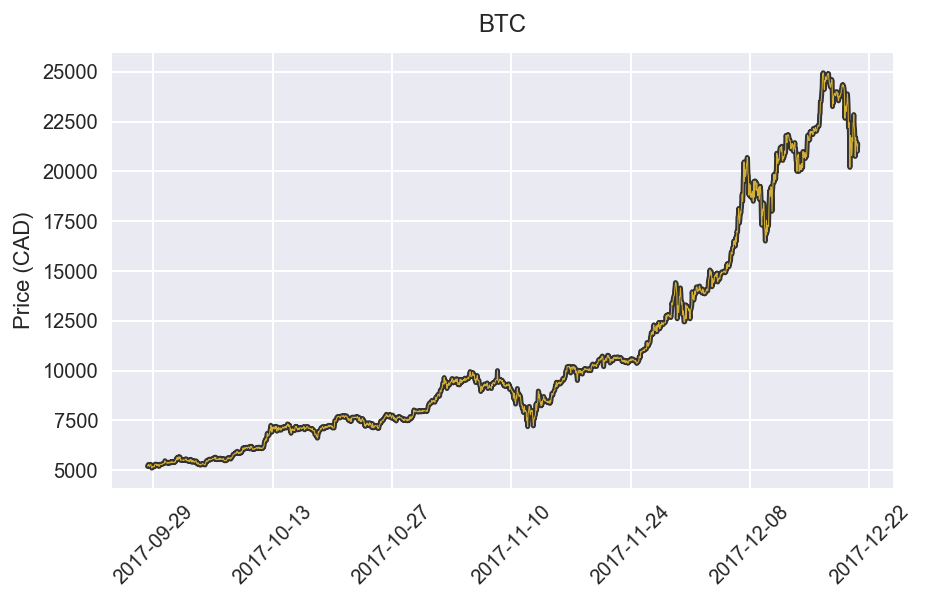

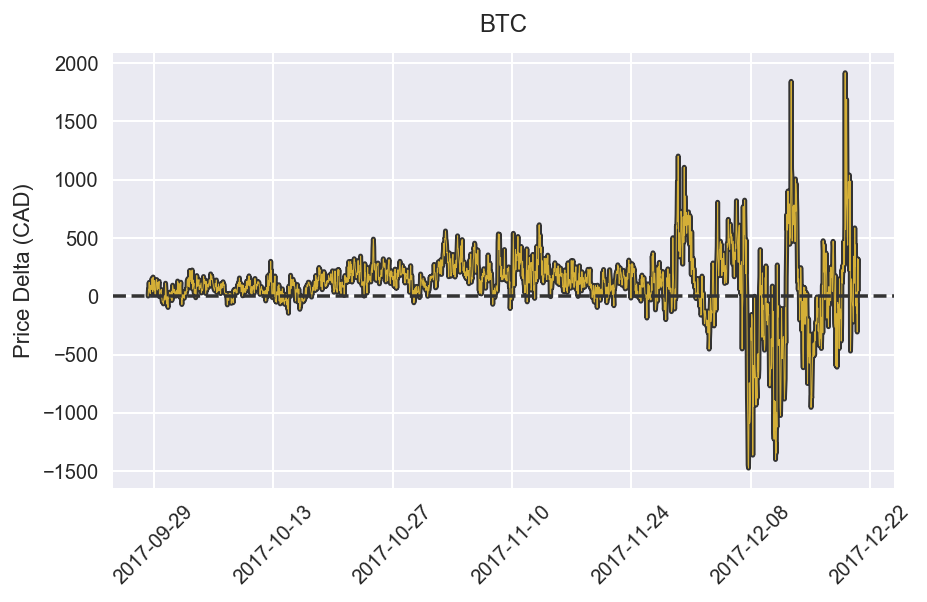

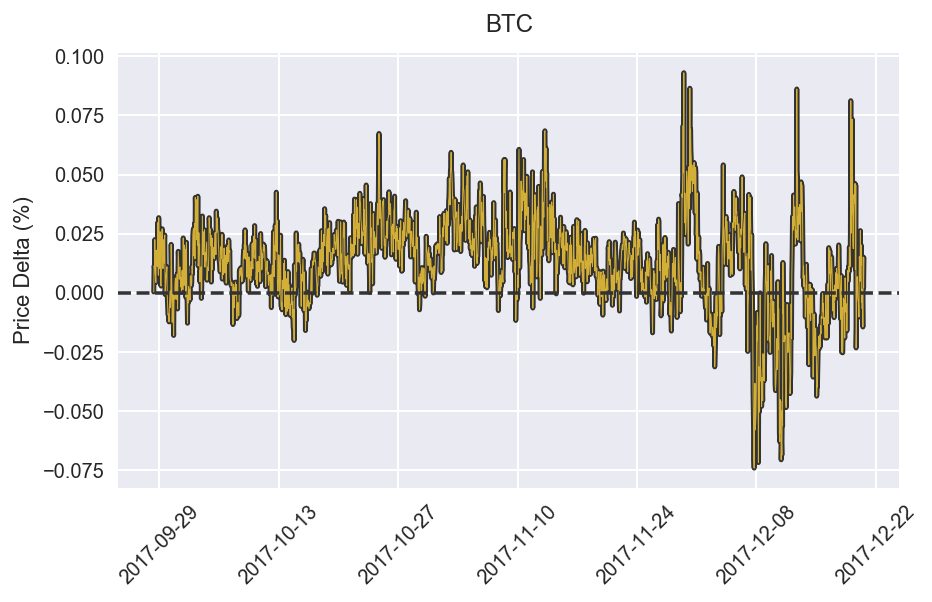

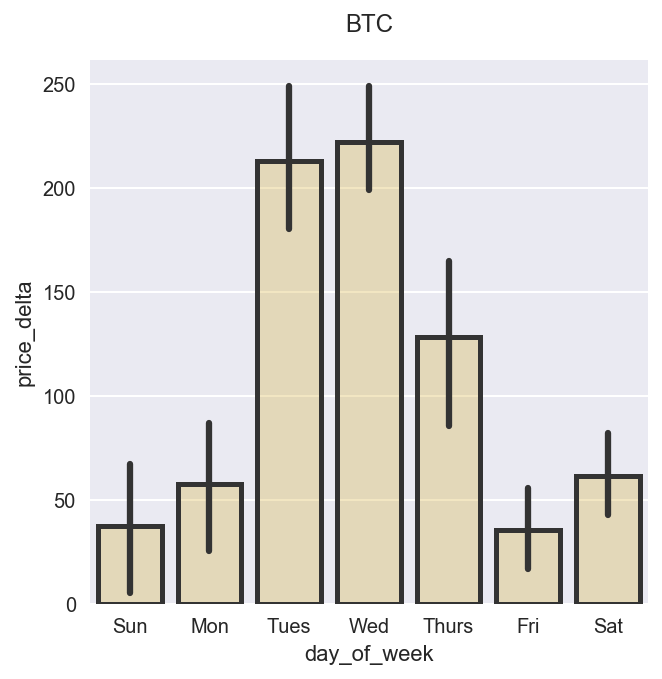

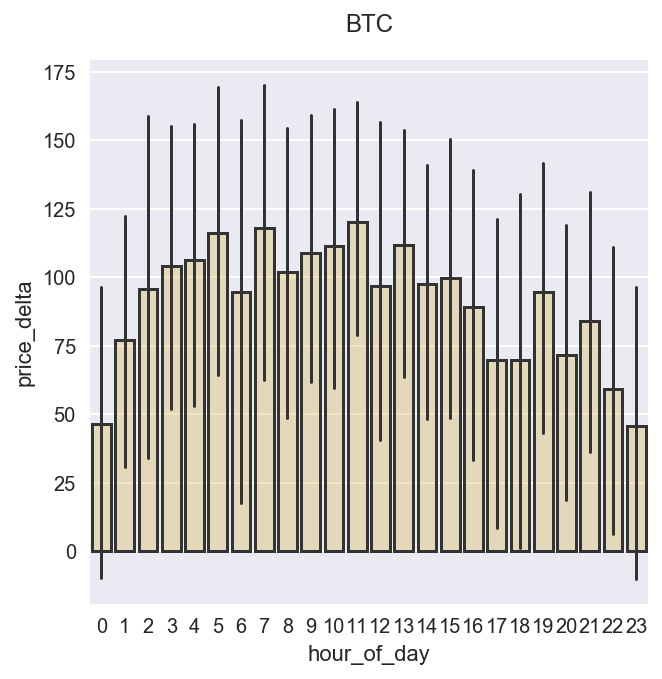

In [24]:
make_plots('btc')

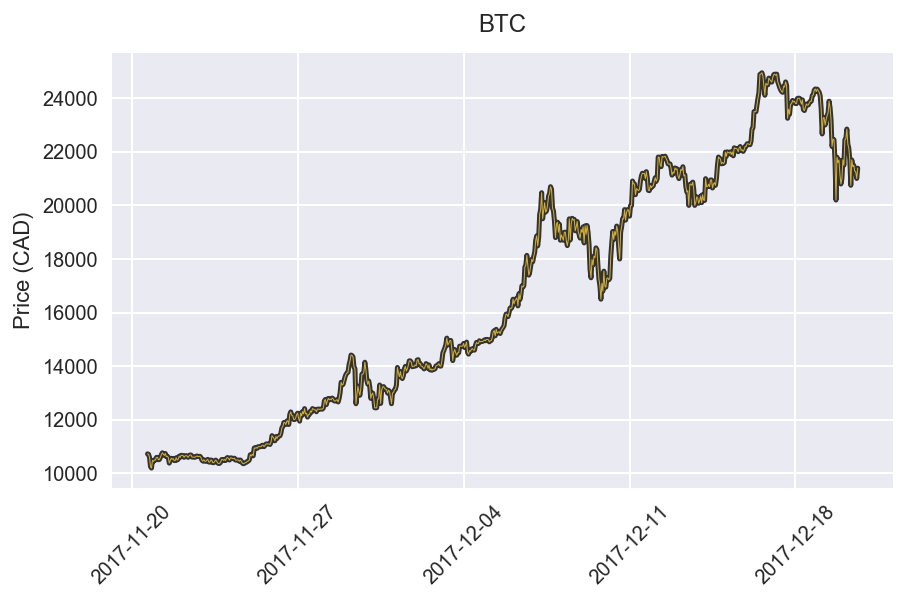

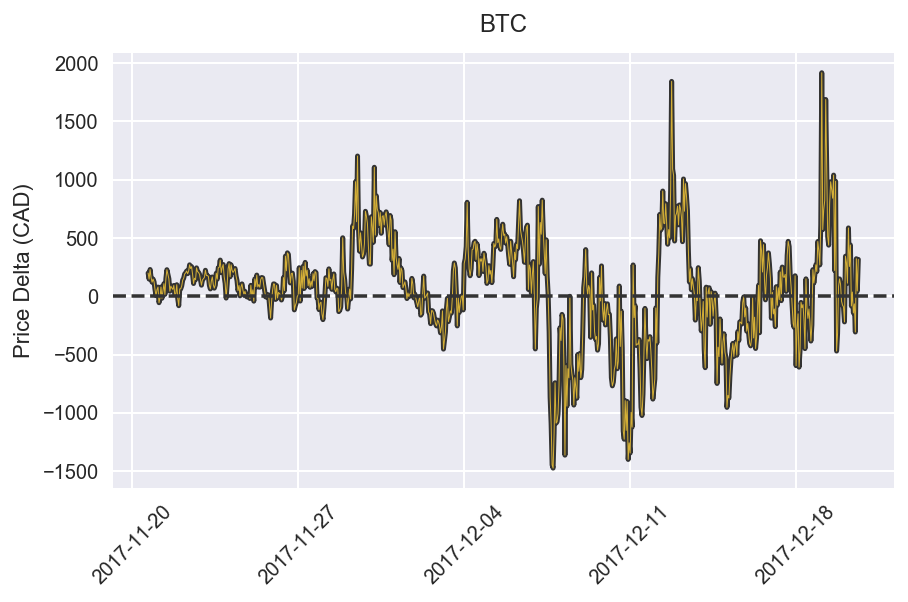

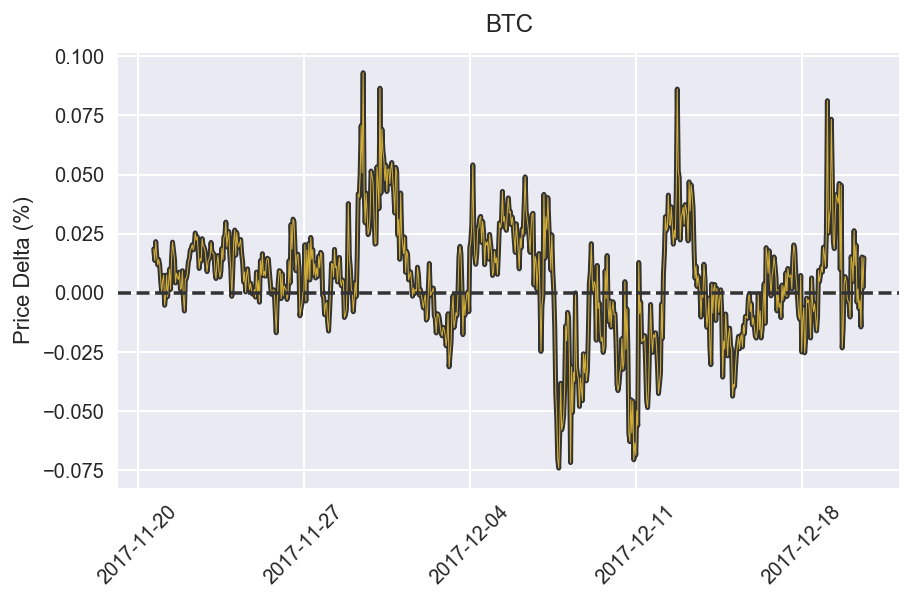

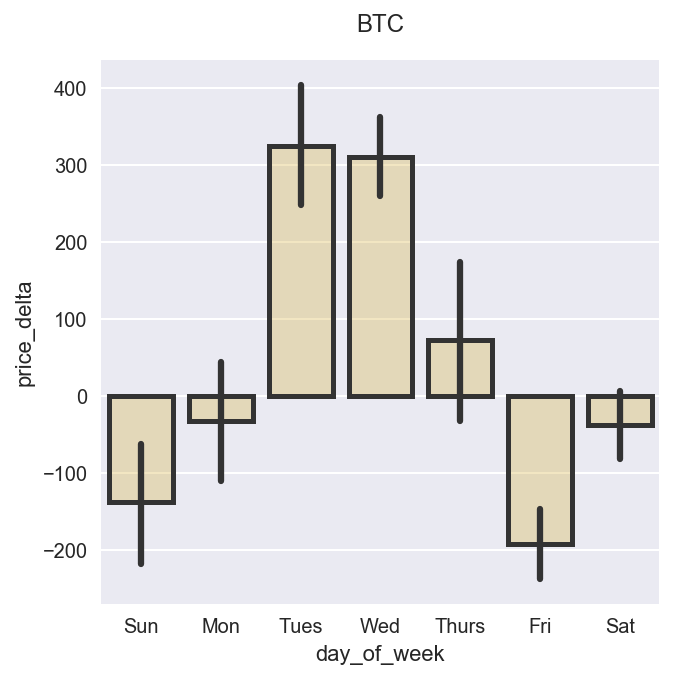

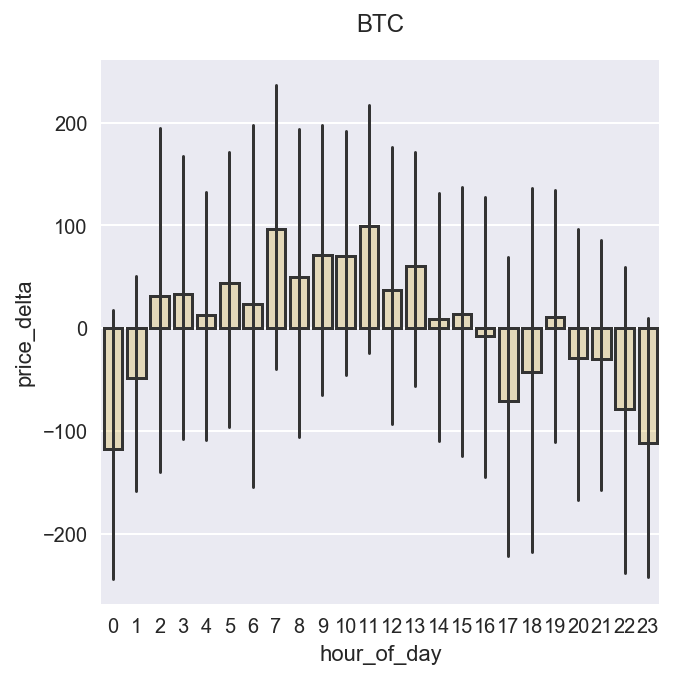

In [25]:
make_plots('btc', prev_days=30)

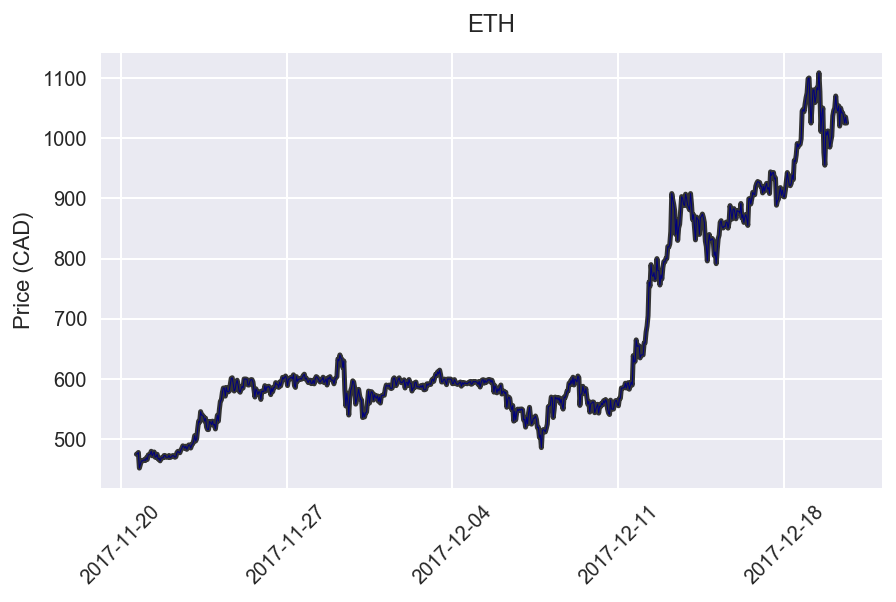

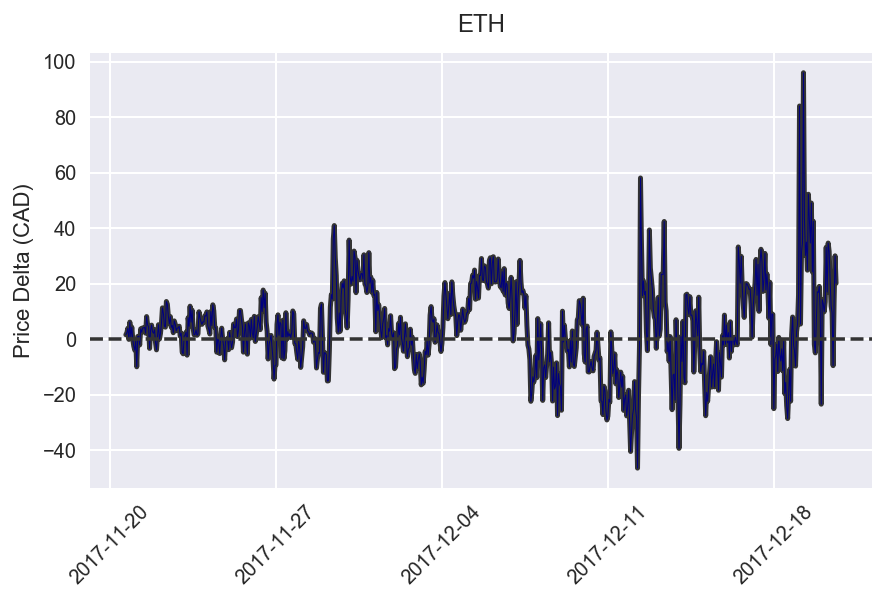

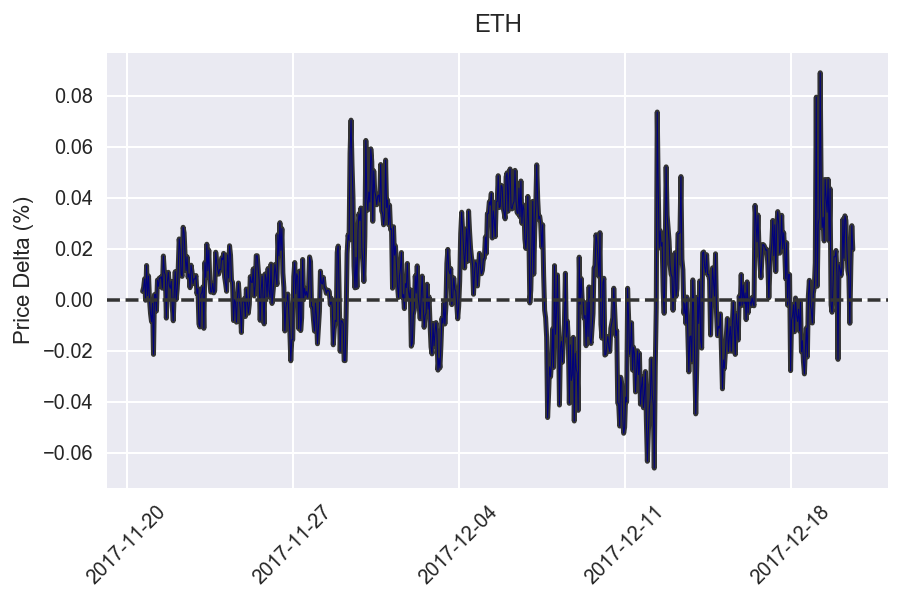

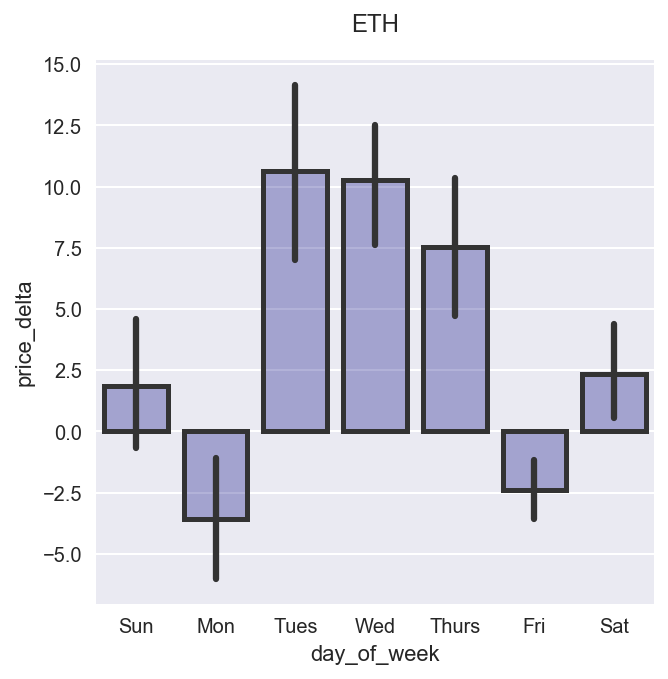

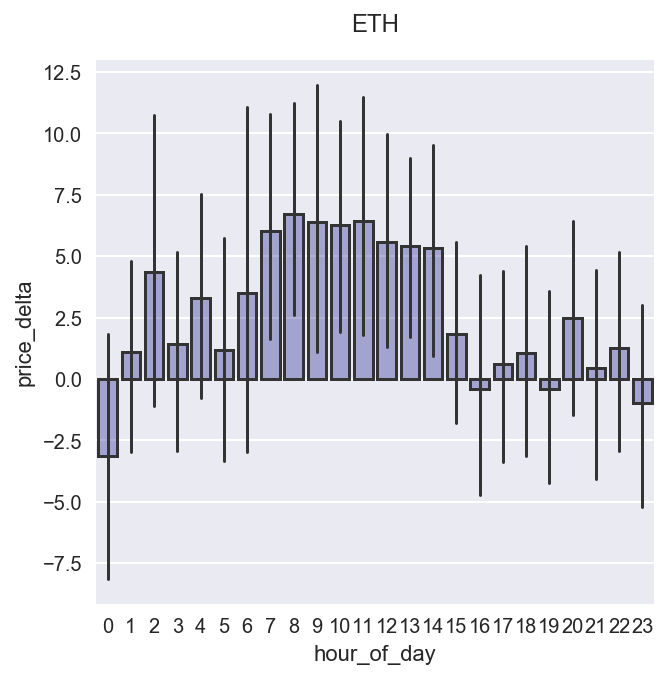

In [26]:
make_plots('eth', prev_days=30)

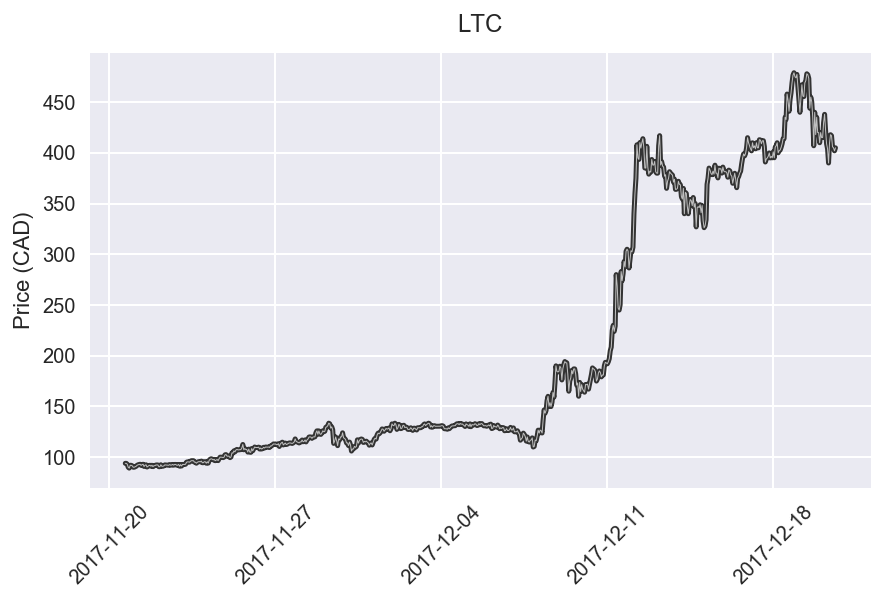

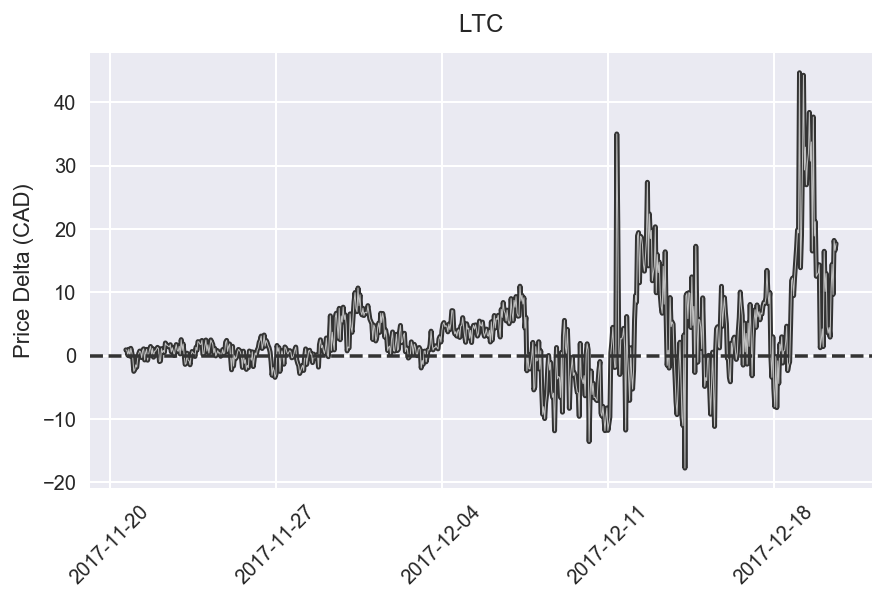

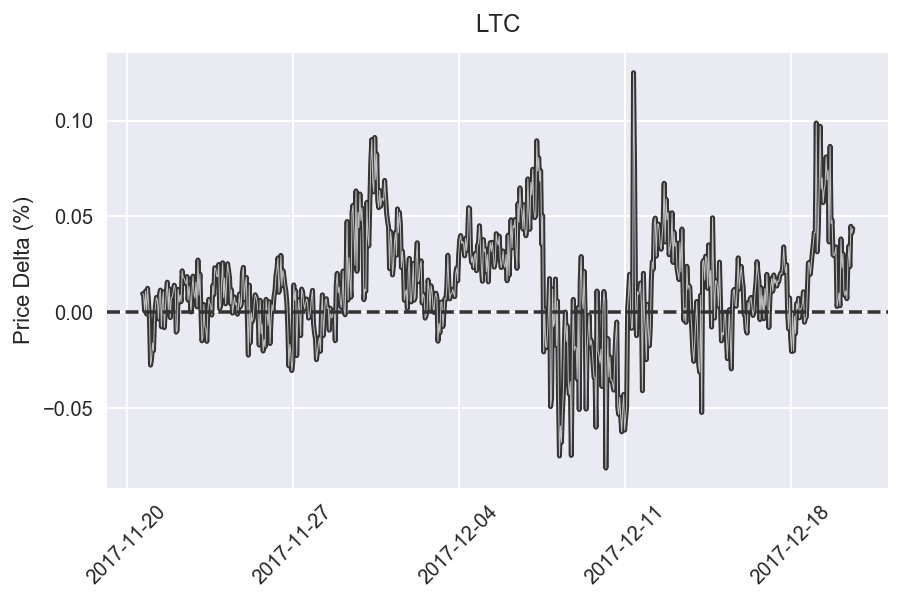

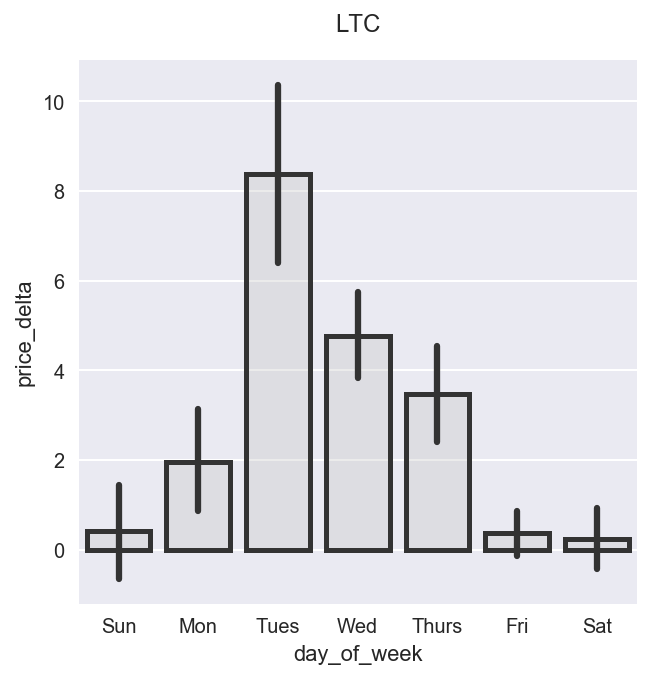

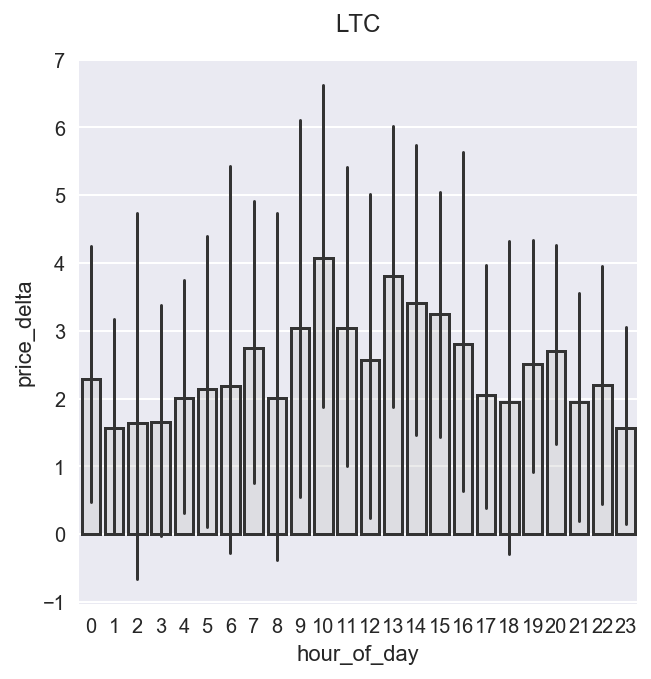

In [27]:
make_plots('ltc', prev_days=30)